In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [2]:
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

In [3]:
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)

In [4]:
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_wine, y_train_wine)

KNeighborsClassifier()

In [5]:
y_pred_wine = knn_model.predict(X_test_wine)


In [6]:
report = classification_report(y_test_wine, y_pred_wine, target_names=wine.target_names, output_dict=True)

In [7]:
accuracy_wine = report['accuracy']
precision_wine = report['weighted avg']['precision']
recall_wine = report['weighted avg']['recall']

In [8]:
print(f'Accuracy (k={k}): {accuracy_wine:.2f}')
print(f'Precision (k={k}): {precision_wine:.2f}')
print(f'Recall (k={k}): {recall_wine:.2f}')

Accuracy (k=5): 0.74
Precision (k=5): 0.74
Recall (k=5): 0.74


In [9]:
k_values = [1, 3, 5, 7, 9]
accuracies = []

In [10]:
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_wine, y_train_wine)
    y_pred_wine = knn_model.predict(X_test_wine)
    report = classification_report(y_test_wine, y_pred_wine, output_dict=True)
    accuracies.append(report['accuracy'])

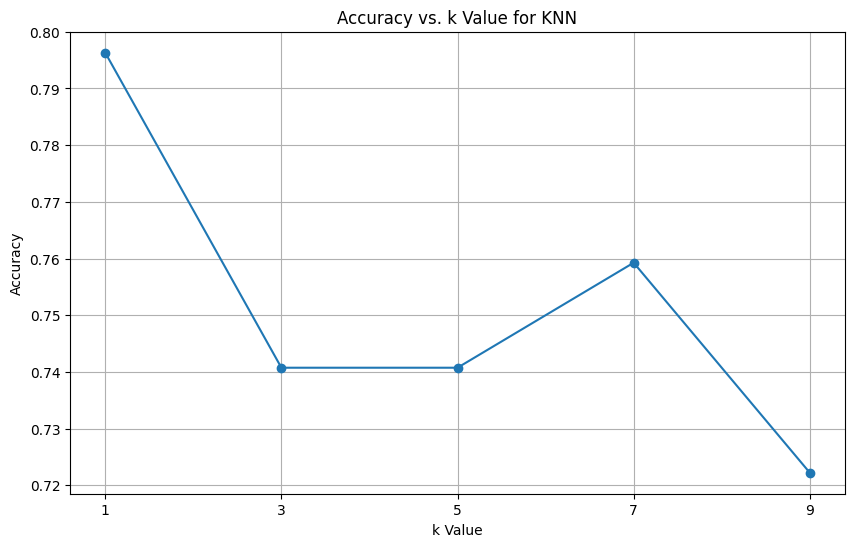

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. k Value for KNN')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()